In [2]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
from scipy import optimize
import csv
import imageio
import bz2
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches

## This script analysis the JDDC fitting result with wrong initialization

In [99]:
# Extract all peak positions from csv file
path = 'D:/2020/JDDC/DoseTest_exp/10Frames/10Frames_B1_WrongInitialization/'
csvFileName = path + 'bump-0_003-centers.csv'
txtFileName = path + 'bump-0_003.txt'
start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        peaks_x.append(float(row[0]))
        peaks_y.append(float(row[1]))
        
with open(txtFileName) as f:
    content = f.readlines()
    content = [x.strip() for x in content]
    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
# print(len(peaks_x))
# print(len(peaks_int))
# print(len(peaks_y))

(-23.849999999999998,
 170.84999999999997,
 -20.799999999999997,
 172.79999999999998)

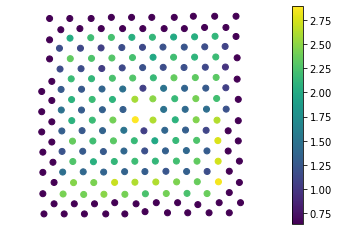

In [37]:
plt.scatter(peaks_x, peaks_y,c=np.asarray(peaks_int))
plt.colorbar()
plt.axis('equal')
plt.axis('off')

In [44]:
# Filter the peaks to exclude the ones around the border
array_x = np.asarray(peaks_x)
array_y = np.asarray(peaks_y)
array_int = np.asarray(peaks_int)
index = np.where((array_x>10) & (array_x<135) & (array_y > 10) & (array_y < 135))
array_x = array_x[index]
array_y = array_y[index]
array_int = array_int[index]
# Filter the peaks to exclude Ti peaks
threshold = 1.6    # set a threshold to distinguish two sets of sub-lattice
lattice1 = np.where(array_int>threshold)
array_x1 = array_x[lattice1]
array_y1 = array_y[lattice1]
array_int1 = array_int[lattice1]

(-0.5, 149.5, 149.5, -0.5)

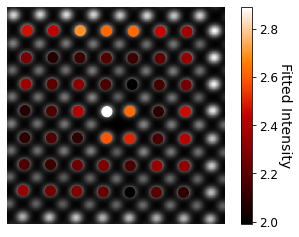

In [101]:
image = loadFromQ2bz(path + 'bump-0_003.q2bz')
plt.imshow(image,cmap='gray')
im = plt.scatter(array_x1, array_y1, c=np.asarray(array_int1),s=100, cmap='gist_heat')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Fitted Intensity',rotation=270,fontsize=14, labelpad = 14)
plt.axis('off')

(4.786624999999999, 129.171875, 10.257724999999997, 133.188775)

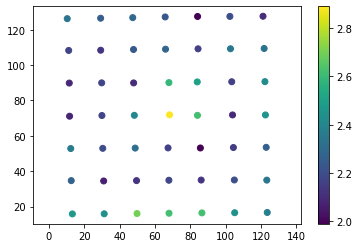

In [45]:
plt.scatter(array_x1, array_y1,c=np.asarray(array_int1))
plt.colorbar()
plt.axis('equal')
# plt.axis('off')

(5.650984999999999, 129.13071499999998, 11.168774999999998, 114.05672499999999)

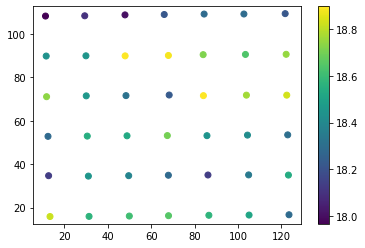

In [94]:
x_cor_y, y_cor_y, y_sep = FindYStd(array_x1, array_y1, 18)
plt.scatter(x_cor, y_cor, c=y_sep)
plt.colorbar()
plt.axis('equal')
# plt.axis('off')

(-0.5, 6.5, 5.5, -0.5)

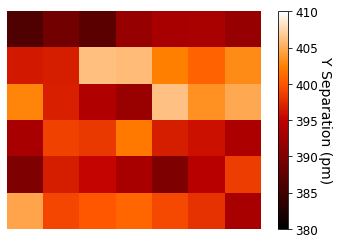

In [62]:
y_sep_array = ConvertToArray(x_cor, y_cor, y_sep, 6, 7)
im = plt.imshow(np.flipud(y_sep_array * 21.5),cmap='gist_heat',clim = [380,410])
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Y Separation (pm)',rotation=270,fontsize=14, labelpad = 14)
plt.axis('off')

(5.650984999999999, 129.13071499999998, 11.168774999999998, 114.05672499999999)

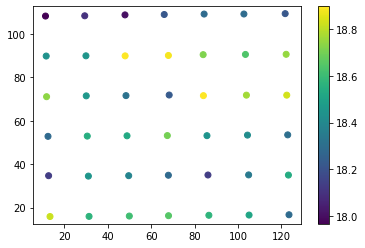

In [95]:
x_cor_x, y_cor_x, x_sep = FindXStd(array_x1, array_y1, 18)
plt.scatter(x_cor, y_cor, c=y_sep)
plt.colorbar()
plt.axis('equal')
# plt.axis('off')

(-0.5, 5.5, 6.5, -0.5)

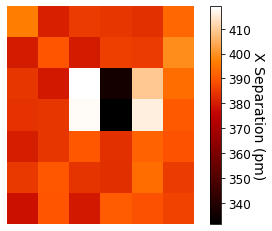

In [56]:
x_sep_array = ConvertToArray(x_cor, y_cor, x_sep, 7, 6)
im = plt.imshow(np.flipud(x_sep_array * 21),cmap='gist_heat')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('X Separation (pm)',rotation=270,fontsize=14, labelpad = 14)
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

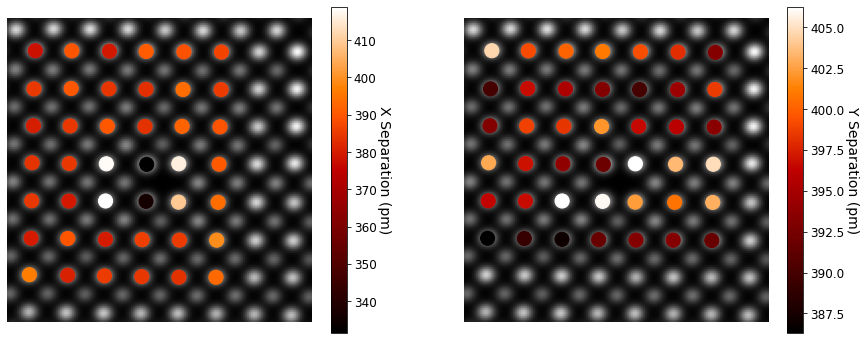

In [96]:
# Plot x and y separation on the fitted image
image = loadFromQ2bz(path + 'bump-0_003.q2bz')

fig = plt.figure(figsize=[15,6])
plt.subplot(121)
plt.imshow(image,cmap='gray')
im = plt.scatter(x_cor_x, y_cor_x, c=np.asarray(x_sep)*21,s=200,clim = [380,410], cmap='gist_heat')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('X Separation (pm)',rotation=270,fontsize=14, labelpad = 14)
plt.axis('off')


plt.subplot(122)
plt.imshow(image,cmap='gray')
im = plt.scatter(x_cor_y, y_cor_y, c=np.asarray(y_sep)*21.5,s=200,clim = [380,410], cmap='gist_heat')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Y Separation (pm)',rotation=270,fontsize=14, labelpad = 14)
plt.axis('off')

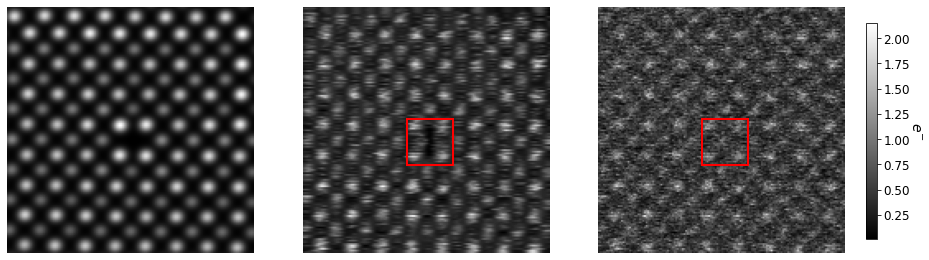

In [98]:
# Directly visulize deformation
# Read data
# Panel 1: fitted peaks, peaks with deformations, and raw data
# path = 'D:/2020/JDDC/DoseTest_exp/10Frames/10Frames_B1_WrongInitialization/'
image = loadFromQ2bz(path + 'bump-0_003.q2bz')
defX = loadFromQ2bz(path + "bump-0_003-y_0.q2bz")
defY = loadFromQ2bz(path + "bump-0_003-y_1.q2bz")
exp = loadFromQ2bz(path + "u0_000.q2bz")

deformed_image = deformImage(image, defX, defY, order=1, mode='nearest')

# Save and display the result
fig = plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
# plt.colorbar()
plt.axis('off')

ax = plt.subplot(132)
plt.imshow(deformed_image, cmap=plt.cm.gray)
rect = patches.Rectangle((63,68),28,28,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.axis('off')

ax = plt.subplot(133)
im = plt.imshow(exp, cmap=plt.cm.gray)
rect = patches.Rectangle((63,68),28,28,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.axis('off')
# plt.show()

cax = fig.add_axes([0.92,0.2,0.01,0.6])
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('$e^{-}$',rotation=270,fontsize=14, labelpad = 12)

# fig.savefig('D:/2020/JDDC/DeformationVisulization/Panel1.tif')

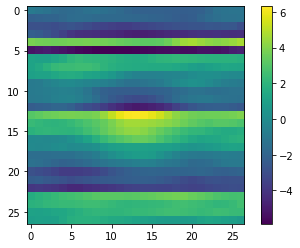

In [17]:
plt.imshow(defX[68:95,63:90])
plt.colorbar()

(-0.5, 26.5, 26.5, -0.5)

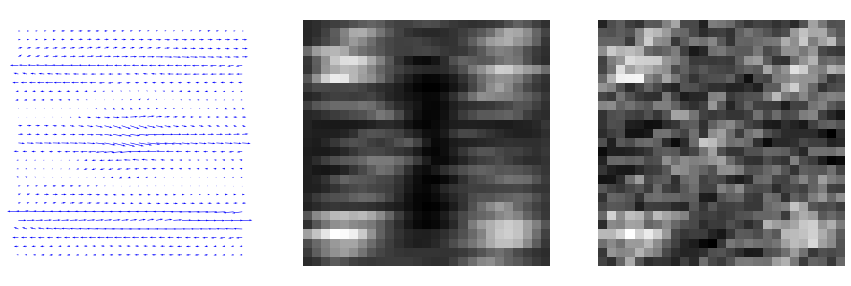

In [13]:
# Panel 2: Zoomed in on a small patch, deformation vectors, deformed image, and raw data
fig = plt.figure(figsize=[15,5])

plt.subplot(131)
defX, defY = np.multiply([defY, defX], (np.max(image.shape)-1))
X, Y = np.meshgrid(np.arange(0, 150, 1), np.arange(0, 150, 1))
ax=plt.quiver(X[68:95,63:90], Y[68:95,63:90], defX[68:95,63:90], defY[68:95,63:90], color='b')
plt.axis('equal')
plt.axis('off')

plt.subplot(132)
plt.imshow(deformed_image[68:95,63:90], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(133)
im = plt.imshow(exp[68:95,63:90], cmap=plt.cm.gray)
plt.axis('off')
# fig.savefig('D:/2020/JDDC/DeformationVisulization/Panel2.tif')

In [74]:
# Split deformation into row displacement and sample drift
row_def_X = []
row_def_Y = []
drift_X = defX
drift_Y = defY

for i in range(1,defX.shape[0]):
    row_def_X.append(defX[i,0] - defX[i-1,-0])
    row_def_Y.append(defY[i,0] - defY[i-1,-0])
    drift_X[i,:] = drift_X[i,:] - (defX[i,0] - defX[i-1,-0])
    drift_Y[i,:] = drift_Y[i,:] - (defY[i,0] - defY[i-1,-0])

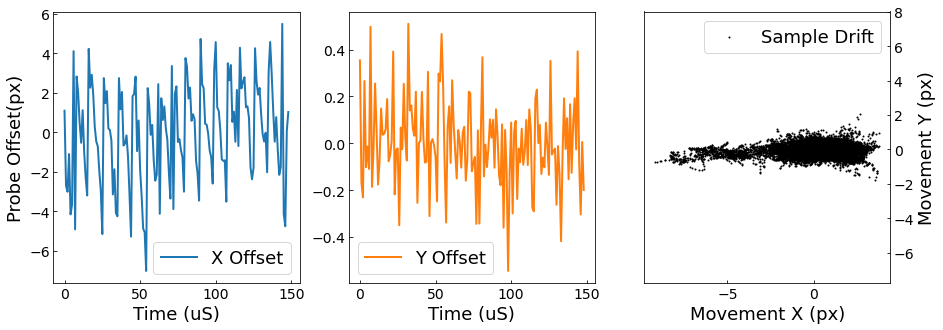

In [77]:
# Panel 3: line offset along x and y, sample random drift
fig = plt.figure(figsize=[15,5])

plt.subplot(131)
plt.plot(row_def_X - np.mean(row_def_X), linewidth = 2, label = 'X Offset')
# plt.plot(row_def_X)
# plt.ylim([-2.5,2.5])
plt.xlabel('Time (uS)',fontsize=18)
plt.ylabel('Probe Offset(px)',fontsize=18)
plt.legend(fontsize = 18)
plt.tick_params(direction='in',labelsize = 14)

plt.subplot(132)
plt.plot(row_def_Y - np.mean(row_def_Y),color='#ff7f0e',linewidth = 2, label = 'Y Offset')
# plt.ylim([-2.5,2.5])
plt.xlabel('Time (uS)',fontsize=18)
plt.legend(fontsize = 18)
plt.tick_params(direction='in',labelsize = 14)

ax = plt.subplot(133)
plt.scatter(drift_X,drift_Y,s=1,color='black', label = 'Sample Drift')
plt.axis('equal')
plt.xlabel('Movement X (px)',fontsize=18)
plt.ylabel('Movement Y (px)',fontsize=18)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.legend(fontsize = 18)
plt.tick_params(direction='in',labelsize = 14)
# plt.xlim([-2,2])
# plt.ylim([-2,2])

# fig.savefig('D:/2020/JDDC/DeformationVisulization/Panel3.tif')

In [6]:
def ConvertToArray(x_cor, y_cor, intensity, num_rows, num_cols):
    array = np.zeros((num_rows, num_cols))
    icol = 0
    x_cor = np.asarray(x_cor)
    y_cor = np.asarray(y_cor)
    intensity = np.asarray(intensity)
    while x_cor.size != 0:
        target = np.argmin(x_cor) # find site with smallest x
        index = np.where((x_cor < x_cor[target]+4) & (x_cor > x_cor[target]-4)) # find all sites in the same column
        array_y_sub = y_cor[index]
        intensity_sub = intensity[index]
        intensity_sub = [intensity_sub for _,intensity_sub in sorted(zip(array_y_sub,intensity_sub))]
        array[:,icol] = intensity_sub
        x_cor = np.delete(x_cor,index)
        y_cor = np.delete(y_cor,index)
        intensity = np.delete(intensity, index)
        icol = icol + 1
    return array

In [7]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    x_cor = []
    y_cor = []
    while array_x1_copy.size != 0:
        index = np.where((array_x1_copy<array_x1_copy[0]+4) & (array_x1_copy>array_x1_copy[0]-4))
        array_y_sub = array_y1_copy[index]
        array_x_sub = array_x1_copy[index]
        array_x_sub = [array_x_sub for _,array_x_sub in sorted(zip(array_y_sub,array_x_sub))]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
                x_cor.append(array_x_sub[i])
                y_cor.append(array_y_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    return x_cor, y_cor, y_sep

In [8]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    x_cor = []
    y_cor = []
    while array_x1_copy.size != 0:
        index = np.where((array_y1_copy<array_y1_copy[0]+4) & (array_y1_copy>array_y1_copy[0]-4))
        array_y_sub = array_y1_copy[index]
        array_x_sub = array_x1_copy[index]
        array_y_sub = [array_y_sub for _,array_y_sub in sorted(zip(array_x_sub,array_y_sub))]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(spacing)
                x_cor.append(array_x_sub[i])
                y_cor.append(array_y_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    return x_cor, y_cor, x_sep

In [9]:
def loadFromQ2bz(path):
    filename, file_extension = os.path.splitext(path)

    if(file_extension == '.q2bz' or file_extension == '.bz2'):
        fid = bz2.open(path, 'rb')
    else:
        fid = open(path, 'rb')
    # Read magic number
    line = fid.readline().rstrip().decode('ascii')
    if(line[0] != 'P'):
        quit("Invalid array header, doesn't start with 'P'")
    if(line[1] != '9'):
        quit("Invalid data type, only double is supported currently")
    fid.readline().rstrip()  # Skip header

    # Read width and height
    arr = fid.readline().rstrip().split()
    width = int(arr[0])
    height = int(arr[1])

    # Read max, but be careful not to read more than one new line after max.
    # The binary data could start with a value that is equivalent to a
    # new line.
    max = ""
    while True:
        c = fid.read(1)
        if c == b'\n':
            break
        max = max + str(int(c))

    max = int(max)

    # Read image to vector
    x = np.frombuffer(fid.read(), np.float64)
    img = x.reshape(width, height)
    return img

In [10]:
def deformImage(image, displacementX, displacementY, order=1, mode='nearest', cval=0.0):
    # Convert the displacement to a coordinate system
    coords = np.mgrid[0:image.shape[0], 0:image.shape[1]] \
             + np.multiply([displacementY, displacementX], (np.max(image.shape)-1))

    # Resample the image at the coordinates obtained from the displacement to deform the image
    return ndimage.map_coordinates(image, coords, order=order, mode=mode, cval=cval)